<a href="https://colab.research.google.com/github/srinathchowdary11/Advanced-Machine-Learning/blob/main/Assignment-2/Assignment-2-AML-Cats%20vs%20Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment - 2 **

**CATS VS** **DOGS**




Importing Kaggle Json File

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srinathchowdaryalla","key":"332b38dc086a9abe0884fc863bfd4df8"}'}

Creadting the directory for the Kaggle in the Drive

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the data from the cats vs dogs data from the kaggle.

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:28<00:00, 30.5MB/s]
100% 812M/812M [00:28<00:00, 30.3MB/s]


Unzipping the cats vs dogs data

In [ ]:
!unzip -qq dogs-vs-cats.zip

Training the data

In [ ]:
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=700, end_index=1700)
make_subset("validation", start_index=1700, end_index=2700)
make_subset("test", start_index=2700, end_index=3700)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model1 = keras.Model(inputs=inputs, outputs=outputs)

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

It is possible that the model overfits during **DATA PREPROCESSING**. We use a regularization technique to address this. All of the images go through this process of becoming tensors.

In [ ]:
model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


There are several uses for callbacks in machine learning. They can be used to                                                  schedule adjustments to the                  learning rate, log metrics, stop training too soon if the model isn't developing, and store the model's weights at the end of each epoch.

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 10s 66ms/step - loss: 0.6963 - accuracy: 0.4935 - val_loss: 0.6914 - val_accuracy: 0.5150
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6913 - accuracy: 0.5510 - val_loss: 0.6511 - val_accuracy: 0.6310
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6576 - accuracy: 0.6195 - val_loss: 0.9339 - val_accuracy: 0.5220
Epoch 4/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6226 - accuracy: 0.6685 - val_loss: 0.6037 - val_accuracy: 0.6600
Epoch 5/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5806 - accuracy: 0.6870 - val_loss: 0.5800 - val_accuracy: 0.6860
Epoch 6/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5568 - accuracy: 0.7305 - val_loss: 0.5568 - val_accuracy: 0.7050
Epoch 7/30
63/63 [==============================] - 3s 41ms/step - loss: 0.5109 - accuracy: 0.7605 - val_loss: 0.6598 - val_accuracy: 0.6640
Epoch 8/30
6

It can be shown that as the number of epochs increases, accuracy increases.

Accuracy=98.3% Val_acc=74.2% test accuracy=71.0%

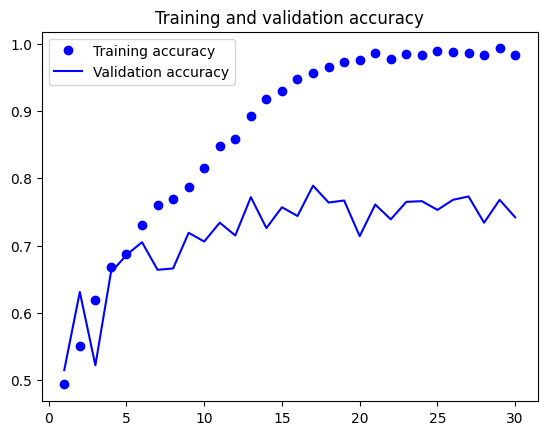

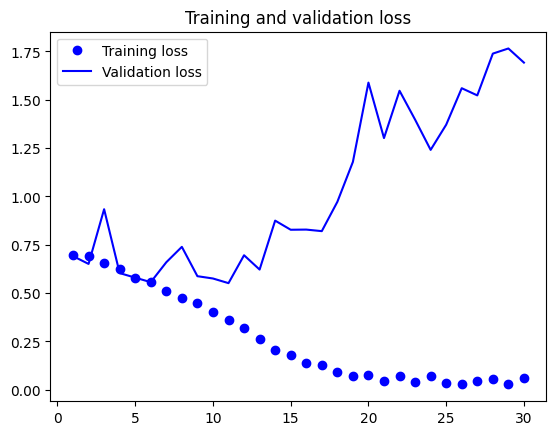

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model1 = keras.models.load_model("convnet_scratch.keras")
test_loss, test_acc = test_model1.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 14ms/step - loss: 0.5985 - accuracy: 0.7100
Test accuracy: 0.710


The test accuracy with out data agumenmtation is 71.0%

**DATA AGUMENTATION**

In order to increase the size of a training set, "data augmentation" creates new, modified versions of the original data. By doing this, overfitting is decreased and the model's ability to generalize is improved.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

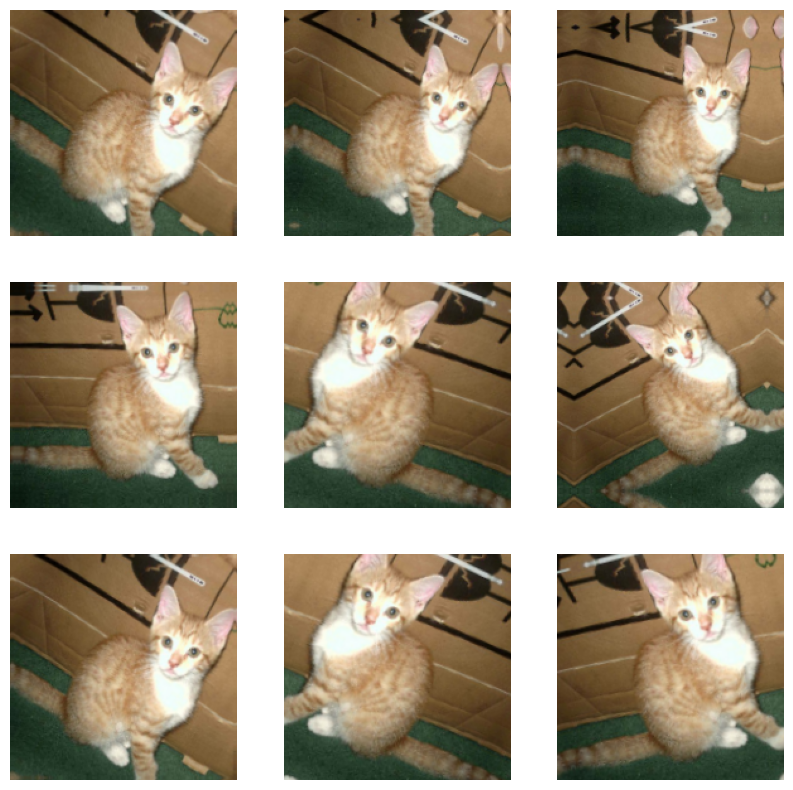

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Image Augmentation and Dropout

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history2 = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 5s 48ms/step - loss: 0.7138 - accuracy: 0.5070 - val_loss: 0.6924 - val_accuracy: 0.5010
Epoch 2/100
63/63 [==============================] - 3s 44ms/step - loss: 0.6943 - accuracy: 0.5090 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 3s 44ms/step - loss: 0.6940 - accuracy: 0.5165 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6897 - accuracy: 0.5590 - val_loss: 0.6707 - val_accuracy: 0.5800
Epoch 5/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6714 - accuracy: 0.6040 - val_loss: 0.6437 - val_accuracy: 0.6230
Epoch 6/100
63/63 [==============================] - 3s 44ms/step - loss: 0.6504 - accuracy: 0.6300 - val_loss: 0.6618 - val_accuracy: 0.5840
Epoch 7/100
63/63 [==============================] - 3s 44ms/step - loss: 0.6482 - accuracy: 0.6400 - val_loss: 0.6488 - val_accuracy: 0.6060
Epoch 

In [ ]:
test_model2 = keras.models.load_model(
    "convnet_augmentation.keras")
test_loss, test_acc = test_model2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 14ms/step - loss: 0.4445 - accuracy: 0.8375
Test accuracy: 0.837


The model's performance was not enhanced by adding more data, but this may be verified by expanding the training sample and trying data augmentation on it.

accuracy = 95.5% test_acc = 83.7% val_acc = 84.4%

Questions 2

**Increasing traning sample size**

Increasing the traning sample size from 1700 to 3000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        # Check if the directory already exists
        if not dir.is_dir():
            os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=1700, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [ ]:
model3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 9s 40ms/step - loss: 0.6890 - accuracy: 0.5607 - val_loss: 0.7057 - val_accuracy: 0.5025
Epoch 2/30
188/188 [==============================] - 7s 39ms/step - loss: 0.6398 - accuracy: 0.6488 - val_loss: 0.5499 - val_accuracy: 0.7215
Epoch 3/30
188/188 [==============================] - 8s 40ms/step - loss: 0.5620 - accuracy: 0.7078 - val_loss: 0.5394 - val_accuracy: 0.7220
Epoch 4/30
188/188 [==============================] - 8s 40ms/step - loss: 0.5107 - accuracy: 0.7533 - val_loss: 0.4740 - val_accuracy: 0.7845
Epoch 5/30
188/188 [==============================] - 8s 40ms/step - loss: 0.4630 - accuracy: 0.7868 - val_loss: 0.5570 - val_accuracy: 0.7175
Epoch 6/30
188/188 [==============================] - 8s 40ms/step - loss: 0.4179 - accuracy: 0.8110 - val_loss: 0.3722 - val_accuracy: 0.8330
Epoch 7/30
188/188 [==============================] - 7s 39ms/step - loss: 0.3624 - accuracy: 0.8378 - val_loss: 0.4120 - val_accuracy: 0.8185

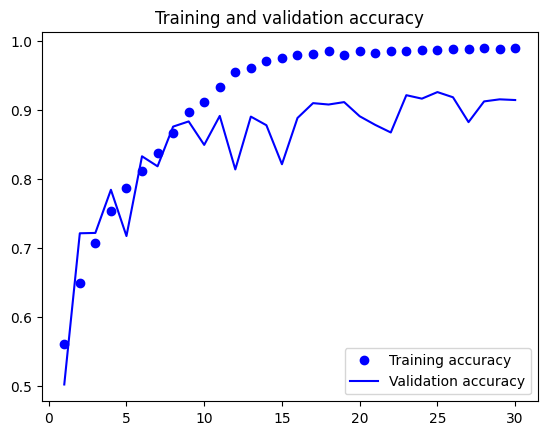

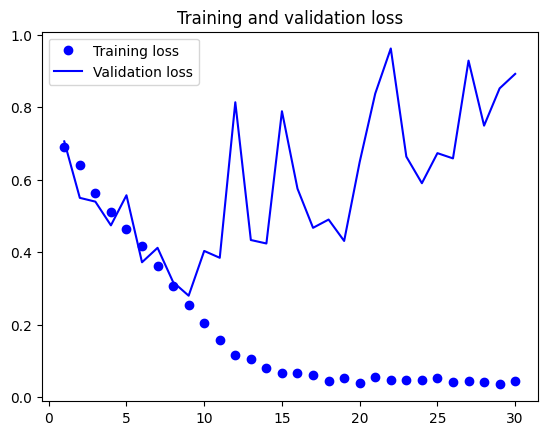

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model3 = keras.models.load_model("convnet_scratch.keras")
test_loss, test_acc = test_model3.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 2s 14ms/step - loss: 0.3405 - accuracy: 0.8660
Test accuracy: 0.866


Accuracy: 98.9%, Test Acc: 86.6%, Val_Acc: 91.4%

**Data Agumentation**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

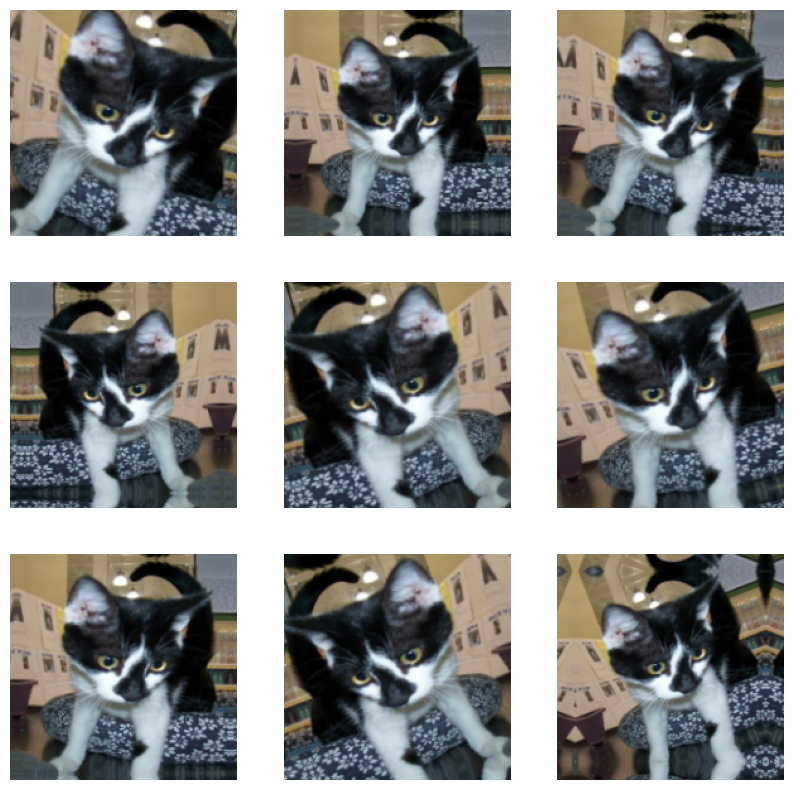

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model4 = keras.Model(inputs=inputs, outputs=outputs)

model4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history4 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
188/188 [==============================] - 9s 42ms/step - loss: 0.6945 - accuracy: 0.5112 - val_loss: 0.7115 - val_accuracy: 0.5005
Epoch 2/30
188/188 [==============================] - 8s 41ms/step - loss: 0.6888 - accuracy: 0.5808 - val_loss: 0.6294 - val_accuracy: 0.6480
Epoch 3/30
188/188 [==============================] - 8s 42ms/step - loss: 0.6452 - accuracy: 0.6372 - val_loss: 0.6015 - val_accuracy: 0.6670
Epoch 4/30
188/188 [==============================] - 8s 42ms/step - loss: 0.6052 - accuracy: 0.6710 - val_loss: 0.5641 - val_accuracy: 0.7095
Epoch 5/30
188/188 [==============================] - 8s 41ms/step - loss: 0.5857 - accuracy: 0.6882 - val_loss: 0.6312 - val_accuracy: 0.6325
Epoch 6/30
188/188 [==============================] - 8s 41ms/step - loss: 0.5614 - accuracy: 0.7130 - val_loss: 0.5993 - val_accuracy: 0.7060
Epoch 7/30
188/188 [==============================] - 8s 41ms/step - loss: 0.5364 - accuracy: 0.7315 - val_loss: 0.4744 - val_accuracy: 0.7730

In [ ]:
test_model4 = keras.models.load_model(
    "convnet_augmentation.keras")
test_loss, test_acc = test_model4.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 2s 14ms/step - loss: 0.2275 - accuracy: 0.9120
Test accuracy: 0.912


Accuracy: 89.1%, Test_acc: 91.2%, Val_acc: 87.4%

Question 3
Finding the Ideal sample size for the test and training

In [ ]:
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_OptimalTrainSamples1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=3000, end_index=5000)
make_subset("validation", start_index=5000, end_index=5500)
make_subset("test", start_index=5500, end_index=7000)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model5 = keras.Model(inputs=inputs, outputs=outputs)

model5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [ ]:
model5.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

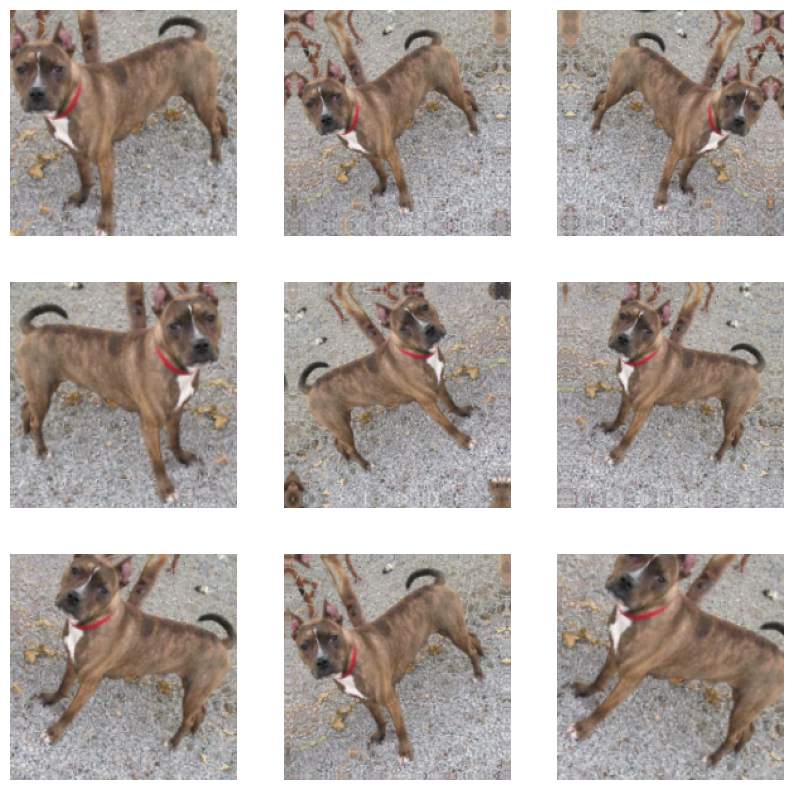

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history5 = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 24s 38ms/step - loss: 0.3309 - accuracy: 0.8582 - val_loss: 0.3499 - val_accuracy: 0.8320
Epoch 2/30
625/625 [==============================] - 24s 38ms/step - loss: 0.3143 - accuracy: 0.8683 - val_loss: 0.3030 - val_accuracy: 0.8860
Epoch 3/30
625/625 [==============================] - 23s 37ms/step - loss: 0.3038 - accuracy: 0.8716 - val_loss: 0.2347 - val_accuracy: 0.8950
Epoch 4/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2970 - accuracy: 0.8775 - val_loss: 0.2354 - val_accuracy: 0.9000
Epoch 5/30
625/625 [==============================] - 23s 37ms/step - loss: 0.3065 - accuracy: 0.8761 - val_loss: 0.1988 - val_accuracy: 0.9110
Epoch 6/30
625/625 [==============================] - 23s 37ms/step - loss: 0.2983 - accuracy: 0.8760 - val_loss: 0.3412 - val_accuracy: 0.8810
Epoch 7/30
625/625 [==============================] - 23s 37ms/step - loss: 0.3169 - accuracy: 0.8734 - val_loss: 0.2655 - val_accuracy:

In [ ]:
test_model5 = keras.models.load_model("convnet_scratch.keras")
test_loss, test_acc = test_model5.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 14ms/step - loss: 0.2484 - accuracy: 0.9080
Test accuracy: 0.908


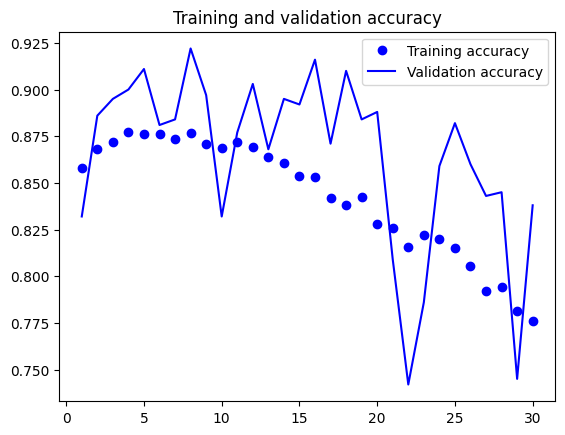

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history6 = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 23s 37ms/step - loss: 0.7828 - accuracy: 0.7582 - val_loss: 0.3721 - val_accuracy: 0.8320
Epoch 2/30
625/625 [==============================] - 23s 37ms/step - loss: 0.9047 - accuracy: 0.7594 - val_loss: 0.3542 - val_accuracy: 0.8260
Epoch 3/30
625/625 [==============================] - 23s 37ms/step - loss: 0.7411 - accuracy: 0.7473 - val_loss: 4.3103 - val_accuracy: 0.6720
Epoch 4/30
625/625 [==============================] - 23s 37ms/step - loss: 0.8652 - accuracy: 0.7487 - val_loss: 0.4609 - val_accuracy: 0.8030
Epoch 5/30
625/625 [==============================] - 23s 37ms/step - loss: 0.7763 - accuracy: 0.7670 - val_loss: 0.6158 - val_accuracy: 0.8260
Epoch 6/30
625/625 [==============================] - 23s 37ms/step - loss: 0.7400 - accuracy: 0.7652 - val_loss: 0.4105 - val_accuracy: 0.8550
Epoch 7/30
625/625 [==============================] - 23s 37ms/step - loss: 0.7362 - accuracy: 0.7540 - val_loss: 0.4985 - val_accuracy:

In [ ]:
test_model5 = keras.models.load_model("convnet_augmentation.keras")
test_loss, test_acc = test_model5.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 14ms/step - loss: 0.3776 - accuracy: 0.8270
Test accuracy: 0.827


In [ ]:
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_OptimalTrainSamples1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train_temp", start_index=0, end_index=7000)
make_subset("validation_temp", start_index=7000, end_index=7500)
make_subset("test_temp", start_index=7500, end_index=9000)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

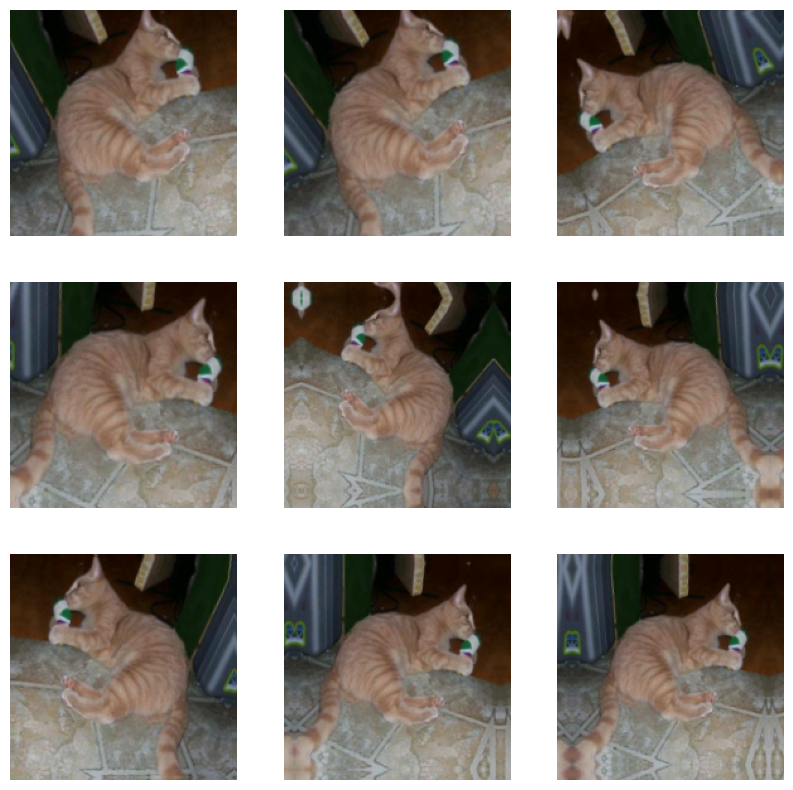

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 24s 36ms/step - loss: 0.6367 - accuracy: 0.6274 - val_loss: 0.5243 - val_accuracy: 0.7280
Epoch 2/30
625/625 [==============================] - 23s 36ms/step - loss: 0.4922 - accuracy: 0.7652 - val_loss: 0.4091 - val_accuracy: 0.8130
Epoch 3/30
625/625 [==============================] - 22s 35ms/step - loss: 0.3996 - accuracy: 0.8205 - val_loss: 0.4214 - val_accuracy: 0.8270
Epoch 4/30
625/625 [==============================] - 22s 35ms/step - loss: 0.3310 - accuracy: 0.8594 - val_loss: 0.3132 - val_accuracy: 0.8700
Epoch 5/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2756 - accuracy: 0.8835 - val_loss: 0.2911 - val_accuracy: 0.8820
Epoch 6/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2363 - accuracy: 0.9007 - val_loss: 0.2994 - val_accuracy: 0.8870
Epoch 7/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2057 - accuracy: 0.9165 - val_loss: 0.2582 - val_accuracy:

In [ ]:
test_model6 = keras.models.load_model("convnet_scratch.keras")
test_loss, test_acc = test_model6.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 14ms/step - loss: 0.3102 - accuracy: 0.8800
Test accuracy: 0.880


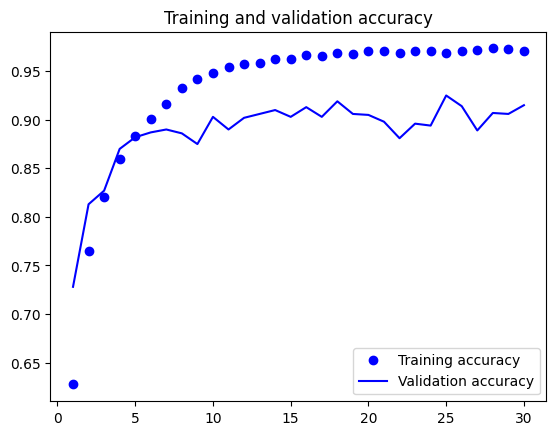

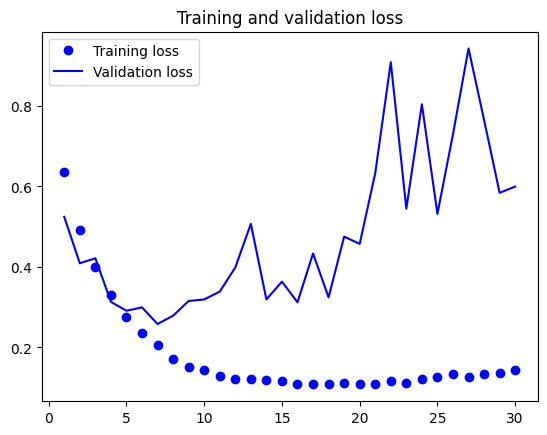

In [ ]:
accuracy = history6.history["accuracy"]
val_accuracy = history6.history["val_accuracy"]
loss = history6.history["loss"]
val_loss = history6.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history7 = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1412 - accuracy: 0.9744 - val_loss: 0.5517 - val_accuracy: 0.9100
Epoch 2/30
625/625 [==============================] - 22s 34ms/step - loss: 0.1343 - accuracy: 0.9740 - val_loss: 0.7350 - val_accuracy: 0.9030
Epoch 3/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1521 - accuracy: 0.9725 - val_loss: 0.5924 - val_accuracy: 0.9210
Epoch 4/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1437 - accuracy: 0.9744 - val_loss: 1.0060 - val_accuracy: 0.8600
Epoch 5/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1462 - accuracy: 0.9737 - val_loss: 0.9065 - val_accuracy: 0.9170
Epoch 6/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1688 - accuracy: 0.9722 - val_loss: 0.9520 - val_accuracy: 0.9030
Epoch 7/30
625/625 [==============================] - 22s 35ms/step - loss: 0.1700 - accuracy: 0.9738 - val_loss: 0.7005 - val_accuracy:

In [ ]:
test_model7 = keras.models.load_model("convnet_augmentation.keras")
test_loss, test_acc = test_model7.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 14ms/step - loss: 0.7373 - accuracy: 0.9070
Test accuracy: 0.907


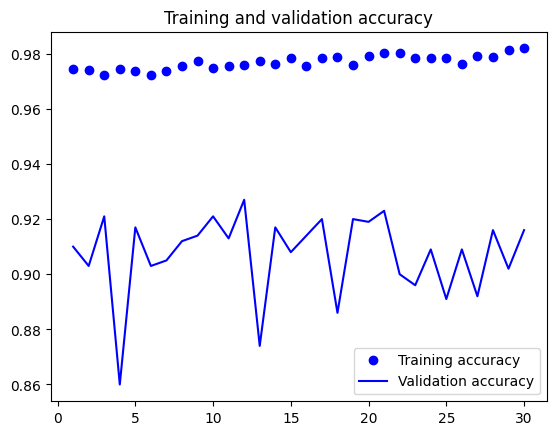

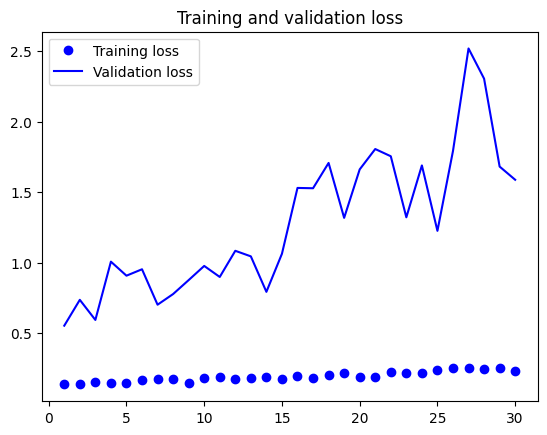

In [ ]:
accuracy = history7.history["accuracy"]
val_accuracy = history7.history["val_accuracy"]
loss = history7.history["loss"]
val_loss = history7.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Question 4
Feature extraction together with data augmentation

Instantiating and freezing the VGG16 convolutional base

In [ ]:
import os
import shutil
import pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Pretrained")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=700, end_index=1700)
make_subset("validation", start_index=1700, end_index=2700)
make_subset("test", start_index=2700, end_index=3000)

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)
train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)
train_features.shape

1/1 [==============================] - 0s 25ms/step


(6000, 5, 5, 512)

Building the Model

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 10.1018 - accuracy: 0.9475 - val_loss: 4.4832 - val_accuracy: 0.9750
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 3.1876 - accuracy: 0.9798 - val_loss: 4.2729 - val_accuracy: 0.9735
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 2.1266 - accuracy: 0.9857 - val_loss: 8.6764 - val_accuracy: 0.9590
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 1.2880 - accuracy: 0.9895 - val_loss: 2.2852 - val_accuracy: 0.9880
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.9851 - accuracy: 0.9903 - val_loss: 2.5349 - val_accuracy: 0.9895
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6225 - accuracy: 0.9945 - val_loss: 2.2094 - val_accuracy: 0.9895
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6355 - accuracy: 0.9940 - val_loss: 2.1795 - val_accuracy: 0.9870
Epoch

In [ ]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 0s 2ms/step - loss: 3.5426 - accuracy: 0.9893
Test accuracy: 0.989


In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)


In [ ]:
conv_base.trainable = False

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_PretrainedIncreasedSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=2500, end_index=3000)
make_subset("test", start_index=3000, end_index=5000)

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 11.2046 - accuracy: 0.9497 - val_loss: 3.2736 - val_accuracy: 0.9765
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 3.8086 - accuracy: 0.9768 - val_loss: 1.8661 - val_accuracy: 0.9865
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 2.0594 - accuracy: 0.9833 - val_loss: 2.2170 - val_accuracy: 0.9875
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 1.1904 - accuracy: 0.9895 - val_loss: 3.7095 - val_accuracy: 0.9825
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 1.1496 - accuracy: 0.9913 - val_loss: 2.4958 - val_accuracy: 0.9855
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5104 - accuracy: 0.9943 - val_loss: 2.3588 - val_accuracy: 0.9885
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5992 - accuracy: 0.9943 - val_loss: 2.2718 - val_accuracy: 0.9870
Epoch

In [ ]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

125/125 [==============================] - 0s 2ms/step - loss: 3.4647 - accuracy: 0.9827
Test accuracy: 0.983


In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_PretrainedoptimalSample")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

# Train the model with varying training sample sizes
sample_sizes = [2700,3000,4500,6000]
history_dict = []
for size in sample_sizes:
    # Set up the training subset
    make_subset("temp_train", start_index=0, end_index=size)
    make_subset("validation", start_index=size, end_index=size+500)
    make_subset("test", start_index=size+500, end_index=size+1500)
    train_dataset = image_dataset_from_directory(
      new_base_dir / "temp_train",
      image_size=(180, 180),
      batch_size=20)
    # Running the callback function to monitor validation loss
    callbacks = [
      keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")]

    # Training the model
    history = model.fit(
      train_features, train_labels,
      epochs=20,
      validation_data=(val_features, val_labels),
      callbacks=callbacks)

   # Testing the model
    test_model = keras.models.load_model("feature_extraction.keras")
    test_loss, test_acc = test_model.evaluate(test_features, test_labels)
    print(f"Test accuracy: {test_acc:.3f}")

Found 5000 files belonging to 2 classes.
Epoch 1/20
188/188 [==============================] - 2s 7ms/step - loss: 8.5824 - accuracy: 0.9507 - val_loss: 2.9792 - val_accuracy: 0.9770
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 3.7798 - accuracy: 0.9770 - val_loss: 2.0600 - val_accuracy: 0.9850
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 2.4726 - accuracy: 0.9835 - val_loss: 6.8566 - val_accuracy: 0.9705
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 1.1965 - accuracy: 0.9892 - val_loss: 2.1848 - val_accuracy: 0.9835
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 0.7023 - accuracy: 0.9937 - val_loss: 1.7956 - val_accuracy: 0.9885
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6908 - accuracy: 0.9940 - val_loss: 2.4177 - val_accuracy: 0.9880
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5797 - accuracy: 0.9945 - val_l

Accuracy: 99.7%, Test Accuracy: 98.8%, Val_acc: 98.90%

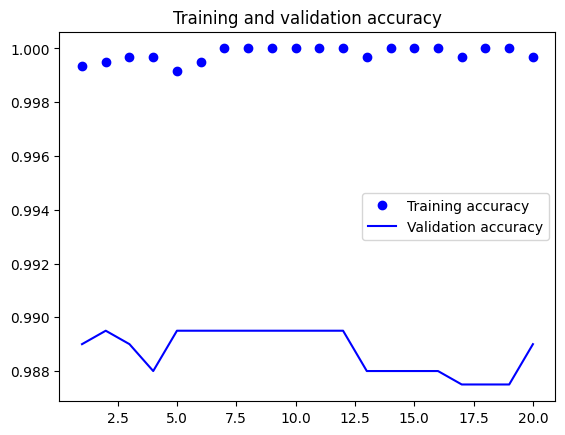

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()